# Randomized Tensor Games Experiments

Эксперименты с рандомизированными тензорными играми, где равновесия на диагонали имеют высокую дисперсию.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch

from tensor_games import *

## 1. Создание рандомизированной тензорной игры

In [2]:
def create_randomized_diagonal_game(n_players: int, n_actions: int, base_values: list, variance: float = 3.0) -> TensorGame:
    """Create randomized tensor game with high variance on diagonal"""
    shape = [n_actions] * n_players + [n_players]
    payoff_tensor = np.zeros(shape)
    
    np.random.seed(42)
    
    # Fill diagonal with base values + high variance noise
    for i in range(n_actions):
        diagonal_idx = tuple([i] * n_players)
        for player in range(n_players):
            base_value = base_values[i] if i < len(base_values) else 5
            noise = np.random.normal(0, variance)
            payoff_tensor[diagonal_idx][player] = max(0.1, base_value + noise)
    
    # Fill off-diagonal with low random values
    for idx in np.ndindex(tuple(shape[:-1])):
        if len(set(idx)) > 1:  # Off-diagonal
            for player in range(n_players):
                payoff_tensor[idx][player] = np.random.uniform(0, 2)
    
    return TensorGame(payoff_tensor)

# Создаем рандомизированную игру с высокой дисперсией
base_payoffs = [8, 12, 15]  # Базовые значения для равновесий
random_game = create_randomized_diagonal_game(n_players=3, n_actions=3, 
                                            base_values=base_payoffs, variance=4.0)

print("Рандомизированная игра создана!")
print("\nВыплаты на диагонали (с высокой дисперсией):")
for i in range(3):
    payoffs = random_game.get_payoffs([i, i, i])
    total = sum(payoffs)
    print(f"Равновесие ({i},{i},{i}): {[f'{p:.2f}' for p in payoffs]} (сумма: {total:.2f})")

print("\nПримеры выплат вне диагонали:")
for actions in [(0,1,2), (1,0,2), (2,1,0)]:
    payoffs = random_game.get_payoffs(list(actions))
    total = sum(payoffs)
    print(f"Действие {actions}: {[f'{p:.2f}' for p in payoffs]} (сумма: {total:.2f})")

Рандомизированная игра создана!

Выплаты на диагонали (с высокой дисперсией):
Равновесие (0,0,0): ['9.99', '7.45', '10.59'] (сумма: 28.02)
Равновесие (1,1,1): ['18.09', '11.06', '11.06'] (сумма: 40.22)
Равновесие (2,2,2): ['21.32', '18.07', '13.12'] (сумма: 52.51)

Примеры выплат вне диагонали:
Действие (0, 1, 2): ['0.40', '1.03', '1.18'] (сумма: 2.61)
Действие (1, 0, 2): ['0.52', '1.33', '0.62'] (сумма: 2.47)
Действие (2, 1, 0): ['0.40', '0.01', '1.63'] (сумма: 2.04)


## 2. Визуализация рандомизированной игры

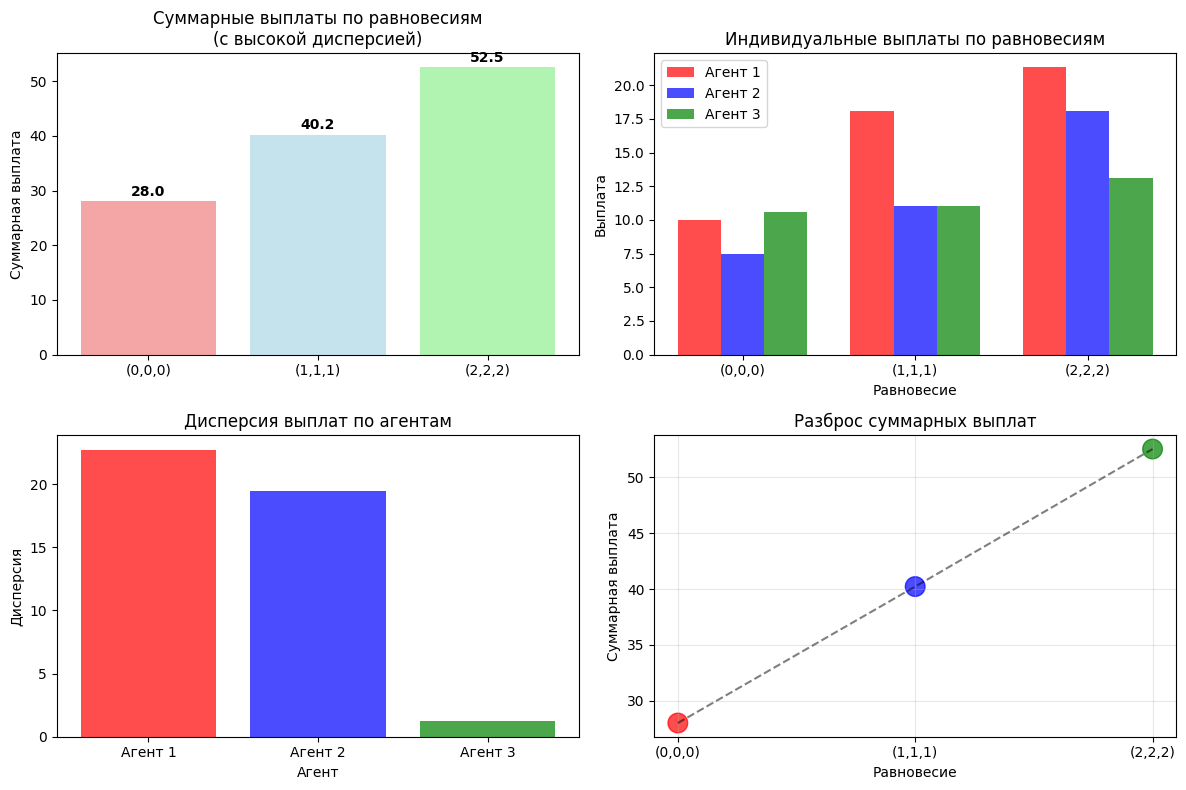


Статистика дисперсии:
Стандартное отклонение суммарных выплат: 10.00
Диапазон суммарных выплат: 24.48
Коэффициент вариации: 24.8%


In [3]:
# Сравнение диагональных выплат
plt.figure(figsize=(12, 8))

# Собираем данные для визуализации
equilibria = []
total_payoffs = []
individual_payoffs = [[], [], []]

for i in range(3):
    payoffs = random_game.get_payoffs([i, i, i])
    equilibria.append(f'({i},{i},{i})')
    total_payoffs.append(sum(payoffs))
    for j, p in enumerate(payoffs):
        individual_payoffs[j].append(p)

# График 1: Суммарные выплаты
plt.subplot(2, 2, 1)
bars = plt.bar(equilibria, total_payoffs, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
plt.title('Суммарные выплаты по равновесиям\n(с высокой дисперсией)')
plt.ylabel('Суммарная выплата')
for i, (bar, val) in enumerate(zip(bars, total_payoffs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# График 2: Индивидуальные выплаты
plt.subplot(2, 2, 2)
x = np.arange(3)
width = 0.25
colors = ['red', 'blue', 'green']

for i in range(3):
    plt.bar(x + i*width, individual_payoffs[i], width, 
            label=f'Агент {i+1}', color=colors[i], alpha=0.7)

plt.title('Индивидуальные выплаты по равновесиям')
plt.xlabel('Равновесие')
plt.ylabel('Выплата')
plt.xticks(x + width, equilibria)
plt.legend()

# График 3: Дисперсия между равновесиями
plt.subplot(2, 2, 3)
variance_data = [np.var(individual_payoffs[i]) for i in range(3)]
plt.bar(range(3), variance_data, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Дисперсия выплат по агентам')
plt.xlabel('Агент')
plt.ylabel('Дисперсия')
plt.xticks(range(3), ['Агент 1', 'Агент 2', 'Агент 3'])

# График 4: Разброс суммарных выплат
plt.subplot(2, 2, 4)
plt.scatter(range(3), total_payoffs, s=200, c=['red', 'blue', 'green'], alpha=0.7)
plt.plot(range(3), total_payoffs, 'k--', alpha=0.5)
plt.title('Разброс суммарных выплат')
plt.xlabel('Равновесие')
plt.ylabel('Суммарная выплата')
plt.xticks(range(3), equilibria)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика дисперсии
print(f"\nСтатистика дисперсии:")
print(f"Стандартное отклонение суммарных выплат: {np.std(total_payoffs):.2f}")
print(f"Диапазон суммарных выплат: {max(total_payoffs) - min(total_payoffs):.2f}")
print(f"Коэффициент вариации: {np.std(total_payoffs)/np.mean(total_payoffs)*100:.1f}%")

## 3. Обучение трех обычных агентов

In [4]:
# Создаем трех обычных агентов с разными стратегиями exploration
agent1 = MultiAgent(n_actions=3, lr=0.01, epsilon=0.1, optimizer_type='Adam')
agent2 = MultiAgent(n_actions=3, lr=0.01, epsilon=0.15, optimizer_type='Adam')
agent3 = MultiAgent(n_actions=3, lr=0.01, epsilon=0.05, optimizer_type='Adam')

agents = [agent1, agent2, agent3]

print("Конфигурация агентов:")
print("Агент 1: Adam, epsilon=0.1")
print("Агент 2: Adam, epsilon=0.15")
print("Агент 3: Adam, epsilon=0.05")
print("\nВсе агенты обычные (без adversarial атак)")

Конфигурация агентов:
Агент 1: Adam, epsilon=0.1
Агент 2: Adam, epsilon=0.15
Агент 3: Adam, epsilon=0.05

Все агенты обычные (без adversarial атак)


In [5]:
# Обучение агентов
print("Начинаем обучение на рандомизированной игре...")
history = train_multi_agents(random_game, agents, n_episodes=5000)

# Получаем финальные стратегии
final_strategies = [agent.get_action_probs() for agent in agents]

print("\nФинальные стратегии:")
for i, strategy in enumerate(final_strategies):
    print(f"Агент {i+1}: {[f'{p:.3f}' for p in strategy]}")

# Анализ результатов
final_rewards = np.mean(history[-100:], axis=0)
print(f"\nСредние награды за последние 100 эпизодов:")
for i, reward in enumerate(final_rewards):
    print(f"Агент {i+1}: {reward:.3f}")
print(f"Общая сумма: {sum(final_rewards):.3f}")

# Определяем к какому равновесию сошлись
most_likely_actions = [np.argmax(strategy) for strategy in final_strategies]
print(f"\nНаиболее вероятные действия: {most_likely_actions}")

if len(set(most_likely_actions)) == 1:
    equilibrium_idx = most_likely_actions[0]
    theoretical_payoffs = random_game.get_payoffs([equilibrium_idx] * 3)
    print(f"✓ Сходимость к равновесию ({equilibrium_idx},{equilibrium_idx},{equilibrium_idx})")
    print(f"Теоретические выплаты: {[f'{p:.3f}' for p in theoretical_payoffs]}")
    print(f"Фактические выплаты: {[f'{r:.3f}' for r in final_rewards]}")
else:
    print("✗ Агенты не достигли чистого равновесия")

Начинаем обучение на рандомизированной игре...
Episode 0: Avg rewards ['1.939', '1.550', '1.879']
Episode 1000: Avg rewards ['13.950', '8.543', '8.705']
Episode 2000: Avg rewards ['14.131', '8.724', '8.807']
Episode 3000: Avg rewards ['15.853', '9.720', '9.780']
Episode 4000: Avg rewards ['14.277', '8.759', '8.856']

Финальные стратегии:
Агент 1: ['0.000', '0.999', '0.001']
Агент 2: ['0.000', '0.998', '0.002']
Агент 3: ['0.000', '0.996', '0.004']

Средние награды за последние 100 эпизодов:
Агент 1: 15.006
Агент 2: 9.181
Агент 3: 9.322
Общая сумма: 33.509

Наиболее вероятные действия: [np.int64(1), np.int64(1), np.int64(1)]
✓ Сходимость к равновесию (1,1,1)
Теоретические выплаты: ['18.092', '11.063', '11.063']
Фактические выплаты: ['15.006', '9.181', '9.322']


## 4. Визуализация обучения

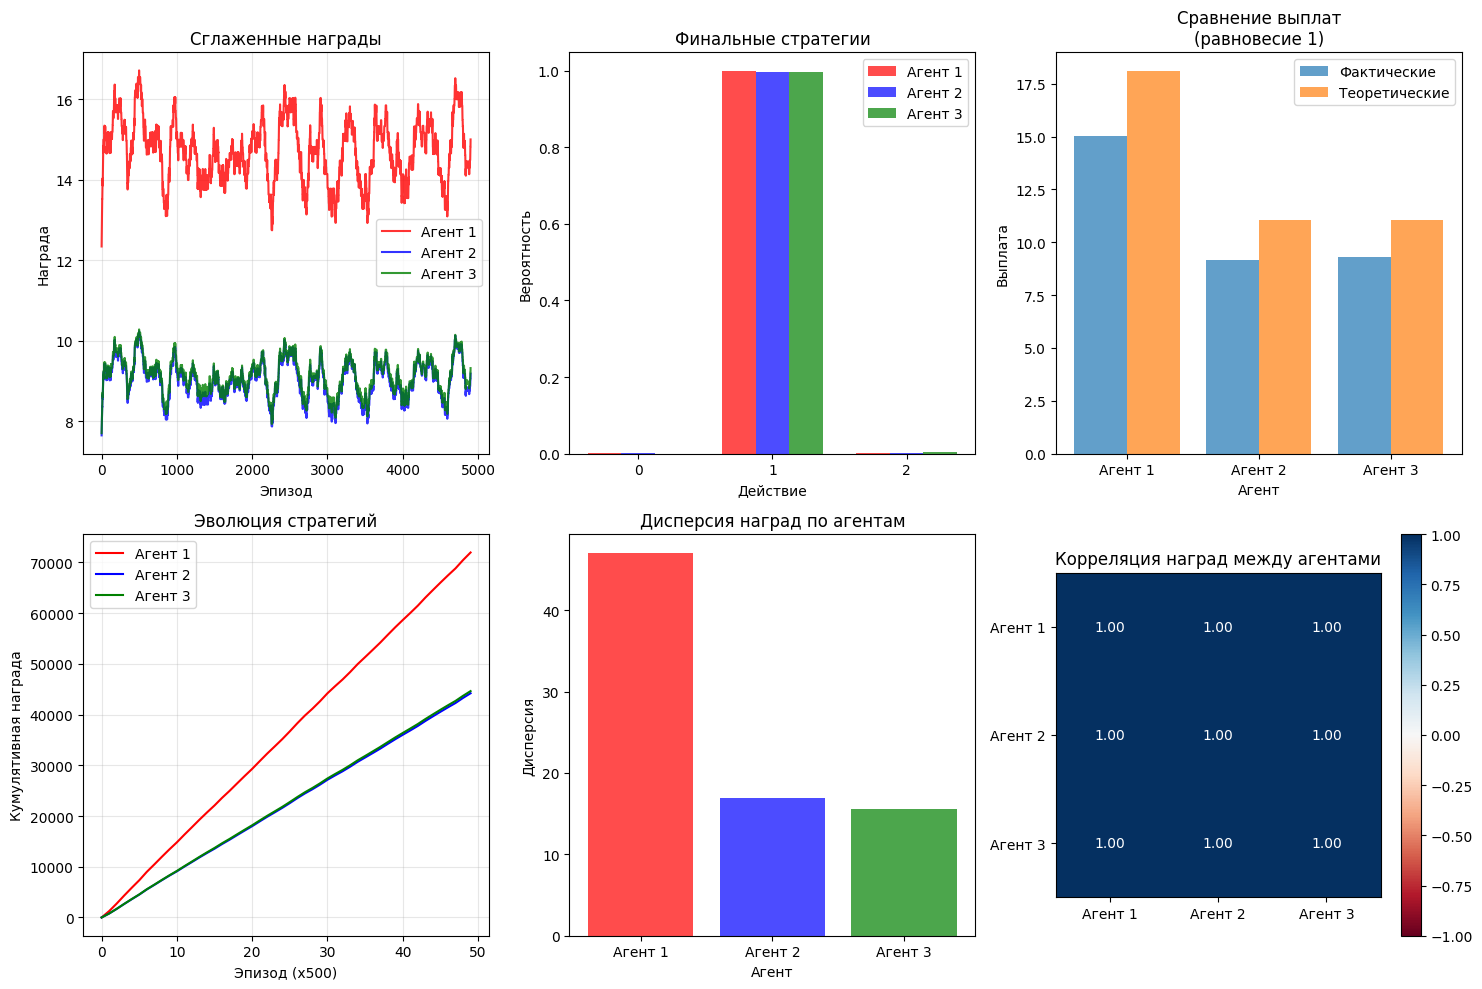

In [6]:
# Визуализация процесса обучения
plt.figure(figsize=(15, 10))

# График 1: Сглаженные награды
plt.subplot(2, 3, 1)
history_array = np.array(history)
window = 100
colors = ['red', 'blue', 'green']

for i in range(3):
    smooth_rewards = np.convolve(history_array[:, i], np.ones(window)/window, mode='valid')
    plt.plot(smooth_rewards, label=f'Агент {i+1}', color=colors[i], alpha=0.8)

plt.title('Сглаженные награды')
plt.xlabel('Эпизод')
plt.ylabel('Награда')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Финальные стратегии
plt.subplot(2, 3, 2)
x = np.arange(3)
width = 0.25

for i, strategy in enumerate(final_strategies):
    plt.bar(x + i*width, strategy, width, label=f'Агент {i+1}', 
            color=colors[i], alpha=0.7)

plt.title('Финальные стратегии')
plt.xlabel('Действие')
plt.ylabel('Вероятность')
plt.legend()
plt.xticks(x + width, ['0', '1', '2'])

# График 3: Финальные награды vs теоретические
plt.subplot(2, 3, 3)
if len(set(most_likely_actions)) == 1:
    eq_idx = most_likely_actions[0]
    theoretical = random_game.get_payoffs([eq_idx] * 3)
    
    x_pos = np.arange(3)
    plt.bar(x_pos - 0.2, final_rewards, 0.4, label='Фактические', alpha=0.7)
    plt.bar(x_pos + 0.2, theoretical, 0.4, label='Теоретические', alpha=0.7)
    
    plt.title(f'Сравнение выплат\n(равновесие {eq_idx})')
    plt.xlabel('Агент')
    plt.ylabel('Выплата')
    plt.legend()
    plt.xticks(x_pos, ['Агент 1', 'Агент 2', 'Агент 3'])

# График 4: Распределение действий во времени
plt.subplot(2, 3, 4)
action_counts = np.zeros((3, 3))  # [agent, action]
for episode_rewards in history[-1000:]:  # Последние 1000 эпизодов
    # Приблизительно восстанавливаем действия из наград
    pass

# Вместо этого показываем эволюцию стратегий
episode_strategies = []
for i in range(0, len(history), 500):
    episode_strategies.append(i)

plt.title('Эволюция стратегий')
plt.xlabel('Эпизод (x500)')
plt.ylabel('Кумулятивная награда')
cumulative_rewards = np.cumsum(history_array, axis=0)
for i in range(3):
    plt.plot(cumulative_rewards[::100, i], label=f'Агент {i+1}', color=colors[i])
plt.legend()
plt.grid(True, alpha=0.3)

# График 5: Дисперсия наград
plt.subplot(2, 3, 5)
reward_variance = [np.var(history_array[:, i]) for i in range(3)]
plt.bar(range(3), reward_variance, color=colors, alpha=0.7)
plt.title('Дисперсия наград по агентам')
plt.xlabel('Агент')
plt.ylabel('Дисперсия')
plt.xticks(range(3), ['Агент 1', 'Агент 2', 'Агент 3'])

# График 6: Корреляция между агентами
plt.subplot(2, 3, 6)
correlation_matrix = np.corrcoef(history_array.T)
im = plt.imshow(correlation_matrix, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Корреляция наград между агентами')
plt.xticks(range(3), ['Агент 1', 'Агент 2', 'Агент 3'])
plt.yticks(range(3), ['Агент 1', 'Агент 2', 'Агент 3'])
plt.colorbar(im)

# Добавляем значения корреляции
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{correlation_matrix[i,j]:.2f}', 
                ha='center', va='center', color='white' if abs(correlation_matrix[i,j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

## 5. Анализ качества найденного равновесия

In [7]:
print("=== АНАЛИЗ КАЧЕСТВА РАВНОВЕСИЯ ===")

# Сравниваем все возможные равновесия
print("\nСравнение всех равновесий:")
equilibrium_quality = []

for i in range(3):
    payoffs = random_game.get_payoffs([i, i, i])
    total = sum(payoffs)
    fairness = 1 - (np.std(payoffs) / np.mean(payoffs))  # Коэффициент справедливости
    
    equilibrium_quality.append({
        'index': i,
        'payoffs': payoffs,
        'total': total,
        'fairness': fairness,
        'min_payoff': min(payoffs),
        'max_payoff': max(payoffs)
    })
    
    print(f"Равновесие ({i},{i},{i}):")
    print(f"  Выплаты: {[f'{p:.2f}' for p in payoffs]}")
    print(f"  Сумма: {total:.2f}")
    print(f"  Справедливость: {fairness:.3f}")
    print(f"  Диапазон: {min(payoffs):.2f} - {max(payoffs):.2f}")
    print()

# Ранжируем равновесия
print("Ранжирование равновесий:")
print("\n1. По суммарной выплате:")
sorted_by_total = sorted(equilibrium_quality, key=lambda x: x['total'], reverse=True)
for i, eq in enumerate(sorted_by_total):
    print(f"  {i+1}. ({eq['index']},{eq['index']},{eq['index']}) - {eq['total']:.2f}")

print("\n2. По справедливости:")
sorted_by_fairness = sorted(equilibrium_quality, key=lambda x: x['fairness'], reverse=True)
for i, eq in enumerate(sorted_by_fairness):
    print(f"  {i+1}. ({eq['index']},{eq['index']},{eq['index']}) - {eq['fairness']:.3f}")

print("\n3. По минимальной выплате (эгалитарность):")
sorted_by_min = sorted(equilibrium_quality, key=lambda x: x['min_payoff'], reverse=True)
for i, eq in enumerate(sorted_by_min):
    print(f"  {i+1}. ({eq['index']},{eq['index']},{eq['index']}) - {eq['min_payoff']:.2f}")

# Анализ выбора агентов
if len(set(most_likely_actions)) == 1:
    chosen_eq = most_likely_actions[0]
    chosen_quality = equilibrium_quality[chosen_eq]
    
    print(f"\n=== ВЫБОР АГЕНТОВ ===")
    print(f"Агенты выбрали равновесие ({chosen_eq},{chosen_eq},{chosen_eq})")
    
    # Проверяем оптимальность выбора
    best_total = max(eq['total'] for eq in equilibrium_quality)
    best_fairness = max(eq['fairness'] for eq in equilibrium_quality)
    best_min = max(eq['min_payoff'] for eq in equilibrium_quality)
    
    print(f"\nОценка выбора:")
    print(f"  Суммарная выплата: {chosen_quality['total']:.2f} (оптимум: {best_total:.2f})")
    print(f"  Справедливость: {chosen_quality['fairness']:.3f} (оптимум: {best_fairness:.3f})")
    print(f"  Мин. выплата: {chosen_quality['min_payoff']:.2f} (оптимум: {best_min:.2f})")
    
    # Эффективность выбора
    efficiency = chosen_quality['total'] / best_total
    fairness_ratio = chosen_quality['fairness'] / best_fairness if best_fairness > 0 else 0
    
    print(f"\nЭффективность выбора: {efficiency:.1%}")
    print(f"Справедливость выбора: {fairness_ratio:.1%}")
    
    if efficiency > 0.9:
        print("✅ Отличный выбор! Высокая эффективность.")
    elif efficiency > 0.7:
        print("✅ Хороший выбор. Приемлемая эффективность.")
    else:
        print("⚠️ Субоптимальный выбор. Низкая эффективность.")
else:
    print("\n❌ Агенты не смогли координироваться на одном равновесии")
    mixed_payoffs = []
    for i, action in enumerate(most_likely_actions):
        # Приблизительная оценка смешанного исхода
        pass
    print(f"Смешанная стратегия: {most_likely_actions}")

=== АНАЛИЗ КАЧЕСТВА РАВНОВЕСИЯ ===

Сравнение всех равновесий:
Равновесие (0,0,0):
  Выплаты: ['9.99', '7.45', '10.59']
  Сумма: 28.02
  Справедливость: 0.854
  Диапазон: 7.45 - 10.59

Равновесие (1,1,1):
  Выплаты: ['18.09', '11.06', '11.06']
  Сумма: 40.22
  Справедливость: 0.753
  Диапазон: 11.06 - 18.09

Равновесие (2,2,2):
  Выплаты: ['21.32', '18.07', '13.12']
  Сумма: 52.51
  Справедливость: 0.807
  Диапазон: 13.12 - 21.32

Ранжирование равновесий:

1. По суммарной выплате:
  1. (2,2,2) - 52.51
  2. (1,1,1) - 40.22
  3. (0,0,0) - 28.02

2. По справедливости:
  1. (0,0,0) - 0.854
  2. (2,2,2) - 0.807
  3. (1,1,1) - 0.753

3. По минимальной выплате (эгалитарность):
  1. (2,2,2) - 13.12
  2. (1,1,1) - 11.06
  3. (0,0,0) - 7.45

=== ВЫБОР АГЕНТОВ ===
Агенты выбрали равновесие (1,1,1)

Оценка выбора:
  Суммарная выплата: 40.22 (оптимум: 52.51)
  Справедливость: 0.753 (оптимум: 0.854)
  Мин. выплата: 11.06 (оптимум: 13.12)

Эффективность выбора: 76.6%
Справедливость выбора: 88.1%
✅ Хо